In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

sns.set(style='white', context='notebook', palette='deep')

In [97]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [98]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [99]:
y_train = train['label']
X_train = train.drop(labels=['label'], axis=1)

del train

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

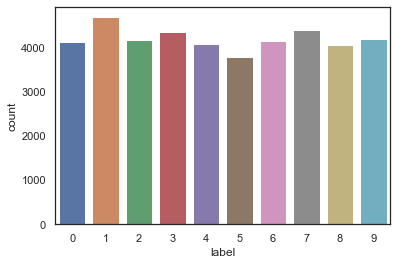

In [100]:
sns.countplot(y_train)
y_train.value_counts()

In [101]:
# Normalisation
X_train = X_train / 255.0
test = test / 255.0

In [102]:
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

In [103]:
# Label Encoding
y_train = to_categorical(y_train, num_classes = 10)
y_train

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [104]:
# Split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.1)

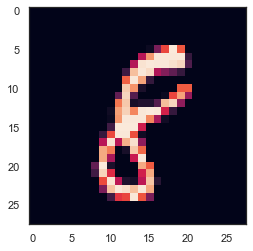

In [105]:
plt.imshow(X_train[0][:,:,0])

## Model

In [106]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5), padding = 'Same', activation = 'relu', input_shape = (28, 28, 1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5), padding = 'Same', activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

In [107]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size = 32,  epochs = 5)

Train on 37800 samples, validate on 4200 samples
Epoch 1/5
37800/37800 [==============================] - 64s 2ms/step - loss: 0.2116 - accuracy: 0.9345 - val_loss: 0.0779 - val_accuracy: 0.9783
Epoch 2/5
37800/37800 [==============================] - 64s 2ms/step - loss: 0.0770 - accuracy: 0.9773 - val_loss: 0.0436 - val_accuracy: 0.9857
Epoch 3/5
37800/37800 [==============================] - 63s 2ms/step - loss: 0.0585 - accuracy: 0.9828 - val_loss: 0.0415 - val_accuracy: 0.9893
Epoch 4/5
37800/37800 [==============================] - 65s 2ms/step - loss: 0.0511 - accuracy: 0.9844 - val_loss: 0.0347 - val_accuracy: 0.9879
Epoch 5/5
37800/37800 [==============================] - 64s 2ms/step - loss: 0.0428 - accuracy: 0.9873 - val_loss: 0.0316 - val_accuracy: 0.9905


## Model Evaluation

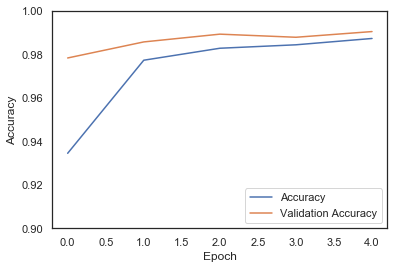

In [108]:
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.9,1])
plt.legend(loc='lower right')

In [109]:
y_pred = np.argmax(model.predict(X_val), axis=1)
y_true = np.argmax(y_val, axis=1)

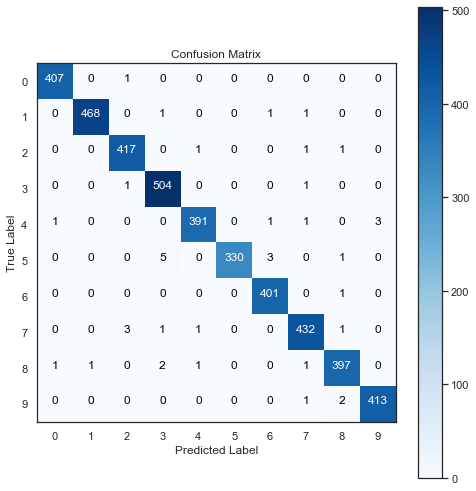

In [110]:
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(7,7))
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, range(10))
plt.yticks(tick_marks, range(10))

for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i,j] > cm.max()/2 else "black")
    
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.tight_layout()

In [115]:
results = pd.Series(np.argmax(model.predict(test), axis=1), name="Label")

In [116]:
results

0        2
1        0
2        9
3        9
4        3
        ..
27995    9
27996    7
27997    3
27998    9
27999    2
Name: Label, Length: 28000, dtype: int64

In [117]:
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1).to_csv("submission.csv",index=False)